In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [5]:
cancer_data = pd.read_csv('../../data/cancer_data_v4.csv')
cancer_data.drop(['WBC', 'EO%', 'EO', 'GLO', 'NEUT%', 'HCT', 'TCH','TBIL', 'IBIL', 'LDH-L'], axis=1, inplace=True)
for fea in cancer_data.columns[6:]:
    median = cancer_data.groupby(['Age_group', 'A=male B=female'])[fea].median()
    cancer_data.set_index(['Age_group', 'A=male B=female'], inplace=True)
    cancer_data[fea].fillna(median, inplace=True)
    cancer_data.reset_index(inplace=True)
cancer_data['A=Case, B=Control'] = cancer_data['A=Case, B=Control'].apply(lambda x: 1 if x=='A' else 0)

group_a = cancer_data[cancer_data['Origin']=='A'].sample(n=848)
group_b = cancer_data[cancer_data['Origin']=='B'] # 212
group_c = cancer_data[cancer_data['Origin']=='C'].sample(n=212)
new = pd.concat([group_b,group_c], axis=0).sample(frac=1,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(new.drop(['Origin','Age_group','A=male B=female','ID', 'A=Case, B=Control', 'Pattern'], axis=1), new['A=Case, B=Control'], test_size=0.3, random_state=0)

In [23]:
print(len(X_train), len(X_test))

4200 1800


# 212:212

In [70]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
xgb_prob = xgb.predict_proba(X_test)[:,1]
xgb_fpr0, xgb_tpr0, _ = roc_curve(y_test, xgb_prob)
xgb_auc0 = auc(xgb_fpr0, xgb_tpr0)
print("ACC:",accuracy_score(y_test, y_pred))
print("REC:",recall_score(y_test, y_pred))
print("SPC:",tn/(tn+fp))
print("AUC:",xgb_auc0)

ACC: 0.65625
REC: 0.5522388059701493
SPC: 0.7704918032786885
AUC: 0.7093222412527527


# 424:424

In [58]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
xgb_prob = xgb.predict_proba(X_test)[:,1]
xgb_fpr1, xgb_tpr1, _ = roc_curve(y_test, xgb_prob)
xgb_auc1 = auc(xgb_fpr1, xgb_tpr1)
print("ACC:",accuracy_score(y_test, y_pred))
print("REC:",recall_score(y_test, y_pred))
print("SPC:",tn/(tn+fp))
print("AUC:",xgb_auc1)

ACC: 0.7490196078431373
REC: 0.6865671641791045
SPC: 0.8181818181818182
AUC: 0.8323670901689898


# 636:636

In [61]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
xgb_prob = xgb.predict_proba(X_test)[:,1]
xgb_fpr2, xgb_tpr2, _ = roc_curve(y_test, xgb_prob)
xgb_auc2 = auc(xgb_fpr2, xgb_tpr2)
print("ACC:",accuracy_score(y_test, y_pred))
print("REC:",recall_score(y_test, y_pred))
print("SPC:",tn/(tn+fp))
print("AUC:",xgb_auc2)

ACC: 0.8507853403141361
REC: 0.828125
SPC: 0.8736842105263158
AUC: 0.9249177631578948


# 848:848

In [65]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
xgb_prob = xgb.predict_proba(X_test)[:,1]
xgb_fpr3, xgb_tpr3, _ = roc_curve(y_test, xgb_prob)
xgb_auc3 = auc(xgb_fpr3, xgb_tpr3)
print("ACC:",accuracy_score(y_test, y_pred))
print("REC:",recall_score(y_test, y_pred))
print("SPC:",tn/(tn+fp))
print("AUC:",xgb_auc3)

ACC: 0.8565815324165029
REC: 0.828125
SPC: 0.8853754940711462
AUC: 0.9358942687747036


# 1060:1060

In [68]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
xgb_prob = xgb.predict_proba(X_test)[:,1]
xgb_fpr4, xgb_tpr4, _ = roc_curve(y_test, xgb_prob)
xgb_auc4 = auc(xgb_fpr4, xgb_tpr4)
print("ACC:",accuracy_score(y_test, y_pred))
print("REC:",recall_score(y_test, y_pred))
print("SPC:",tn/(tn+fp))
print("AUC:",xgb_auc4)

ACC: 0.8710691823899371
REC: 0.8377483443708609
SPC: 0.9011976047904192
AUC: 0.9436094698021176


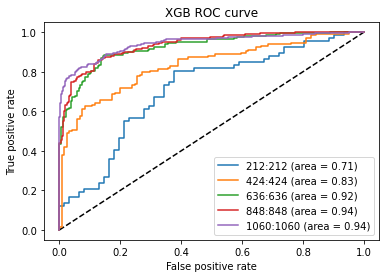

In [74]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(xgb_fpr0, xgb_tpr0, label='212:212 (area = %0.2f)' % xgb_auc0)
plt.plot(xgb_fpr1, xgb_tpr1, label='424:424 (area = %0.2f)' % xgb_auc1)
plt.plot(xgb_fpr2, xgb_tpr2, label='636:636 (area = %0.2f)' % xgb_auc2)
plt.plot(xgb_fpr3, xgb_tpr3, label='848:848 (area = %0.2f)' % xgb_auc3)
plt.plot(xgb_fpr4, xgb_tpr4, label='1060:1060 (area = %0.2f)' % xgb_auc4)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGB ROC curve')
plt.legend(loc="lower right")
plt.show()

# 1:2

In [80]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
xgb_prob = xgb.predict_proba(X_test)[:,1]
xgb_fpr5, xgb_tpr5, _ = roc_curve(y_test, xgb_prob)
xgb_auc5 = auc(xgb_fpr5, xgb_tpr5)
print("ACC:",accuracy_score(y_test, y_pred))
print("REC:",recall_score(y_test, y_pred))
print("SPC:",tn/(tn+fp))
print("AUC:",xgb_auc5)

ACC: 0.6963350785340314
REC: 0.5522388059701493
SPC: 0.7741935483870968
AUC: 0.8109051516610495


# 1:3

In [82]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
xgb_prob = xgb.predict_proba(X_test)[:,1]
xgb_fpr6, xgb_tpr6, _ = roc_curve(y_test, xgb_prob)
xgb_auc6 = auc(xgb_fpr6, xgb_tpr6)
print("ACC:",accuracy_score(y_test, y_pred))
print("REC:",recall_score(y_test, y_pred))
print("SPC:",tn/(tn+fp))
print("AUC:",xgb_auc6)

ACC: 0.8156862745098039
REC: 0.3888888888888889
SPC: 0.9836065573770492
AUC: 0.7865057680631451


# 1:4

In [84]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
xgb_prob = xgb.predict_proba(X_test)[:,1]
xgb_fpr7, xgb_tpr7, _ = roc_curve(y_test, xgb_prob)
xgb_auc7 = auc(xgb_fpr7, xgb_tpr7)
print("ACC:",accuracy_score(y_test, y_pred))
print("REC:",recall_score(y_test, y_pred))
print("SPC:",tn/(tn+fp))
print("AUC:",xgb_auc7)

ACC: 0.8364779874213837
REC: 0.3492063492063492
SPC: 0.9568627450980393
AUC: 0.8016184251478369


# 1:5

In [86]:
xgb = XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
xgb_prob = xgb.predict_proba(X_test)[:,1]
xgb_fpr8, xgb_tpr8, _ = roc_curve(y_test, xgb_prob)
xgb_auc8 = auc(xgb_fpr8, xgb_tpr8)
print("ACC:",accuracy_score(y_test, y_pred))
print("REC:",recall_score(y_test, y_pred))
print("SPC:",tn/(tn+fp))
print("AUC:",xgb_auc8)

ACC: 0.8586387434554974
REC: 0.2898550724637681
SPC: 0.9840255591054313
AUC: 0.8457656155947585


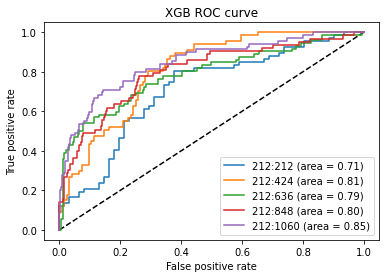

In [87]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(xgb_fpr0, xgb_tpr0, label='212:212 (area = %0.2f)' % xgb_auc0)
plt.plot(xgb_fpr5, xgb_tpr5, label='212:424 (area = %0.2f)' % xgb_auc5)
plt.plot(xgb_fpr6, xgb_tpr6, label='212:636 (area = %0.2f)' % xgb_auc6)
plt.plot(xgb_fpr7, xgb_tpr7, label='212:848 (area = %0.2f)' % xgb_auc7)
plt.plot(xgb_fpr8, xgb_tpr8, label='212:1060 (area = %0.2f)' % xgb_auc8)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGB ROC curve')
plt.legend(loc="lower right")
plt.show()